In [1]:
%matplotlib inline

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np

In [13]:
X = pd.read_csv("Airquality.csv")

In [14]:
print(X)

     Ozone  SolarR  Wind  Temp  Month  Day
0       41     190   7.4    67      5    1
1       36     118   8.0    72      5    2
2       12     149  12.6    74      5    3
3       18     313  11.5    62      5    4
4       17     152  14.3    56      5    5
5       28     135  14.9    66      5    6
6       23     299   8.6    65      5    7
7       19      99  13.8    59      5    8
8        8      19  20.1    61      5    9
9        9     194   8.6    69      5   10
10       7     178   6.9    74      5   11
11      16     256   9.7    69      5   12
12      11     290   9.2    66      5   13
13      14     274  10.9    68      5   14
14      18      65  13.2    58      5   15
15      14     334  11.5    64      5   16
16      34     307  12.0    66      5   17
17       6      78  18.4    57      5   18
18      30     322  11.5    68      5   19
19      11      44   9.7    62      5   20
20       1       8   9.7    59      5   21
21      11     320  16.6    73      5   22
22       4 

In [16]:
y= X.pop("Wind")
X = X.drop(['Month'], 1)

In [17]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

C:\Users\Hadi\Anaconda\lib\site-packages\sklearn\utils\validation.py:332: UserWarning: StandardScaler assumes floating point values as input, got int64
  "got %s" % (estimator, X.dtype))


In [18]:
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [19]:
X.shape

(153, 4)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)
print "R^2:", model.score(X_test, y_test).round(2)

R^2: 0.21


In [21]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print "R^2:", model.score(X_test, y_test).round(2)

R^2: -0.72


In [22]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
print "R^2:", model.score(X_test, y_test).round(2)

R^2: -0.02


In [26]:
X = pd.read_csv("Airquality.csv")
X = X.drop(['Month'], 1)
medianWind = X.Wind.median()
medianWind

9.7

In [27]:
for i in X.Wind.index:
   value = X.Wind[i]   
   if value >= medianWind:
      X.Wind[i] = 0
   else:
      X.Wind[i] = 1

C:\Users\Hadi\Anaconda\lib\site-packages\IPython\kernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Hadi\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [28]:
X

,Ozone,SolarR,Wind,Temp,Day
0,41,190,1,67,1
1,36,118,1,72,2
2,12,149,0,74,3
3,18,313,0,62,4
4,17,152,0,56,5
5,28,135,0,66,6
6,23,299,1,65,7
7,19,99,0,59,8
8,8,19,0,61,9
9,9,194,1,69,10


In [29]:
y = X.pop("Wind")

In [30]:
X.describe()

,Ozone,SolarR,Temp,Day
count,153.000000,153.000000,153.000000,153.000000
mean,40.267974,184.830065,77.882353,15.803922
std,29.083819,89.345264,9.465270,8.864520
min,1.000000,7.000000,56.000000,1.000000
25%,18.000000,115.000000,72.000000,8.000000
50%,32.000000,201.000000,79.000000,16.000000
75%,59.000000,259.000000,85.000000,23.000000
max,122.000000,334.000000,97.000000,31.000000


In [33]:
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head()

,Ozone,SolarR,Temp,Day
0,41,190,67,1
1,36,118,72,2
2,12,149,74,3
3,18,313,62,4
4,17,152,56,5


In [34]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=35)

In [35]:
model.fit(X[numeric_variables], y)

RandomForestRegressor(bootstrap=True, compute_importances=None,
           criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=2, n_estimators=100, n_jobs=1, oob_score=True,
           random_state=35, verbose=0)

In [36]:
model.oob_score_

0.062913439022528772

In [37]:
y_oob = model.oob_prediction_
print "c-stat: ", roc_auc_score(y, y_oob)

c-stat:  0.686402753873


In [40]:
def my_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [41]:
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(X)

,Ozone,SolarR,Temp,Day
0,41,190,67,1
1,36,118,72,2
2,12,149,74,3
3,18,313,62,4
4,17,152,56,5
...,...,...,...,...
148,30,193,70,26
149,58,145,77,27
150,14,191,75,28
151,18,131,76,29


In [42]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

C-stat:  0.679604130809


In [43]:
model.feature_importances_

array([ 0.26201987,  0.23872564,  0.29226395,  0.20699053])

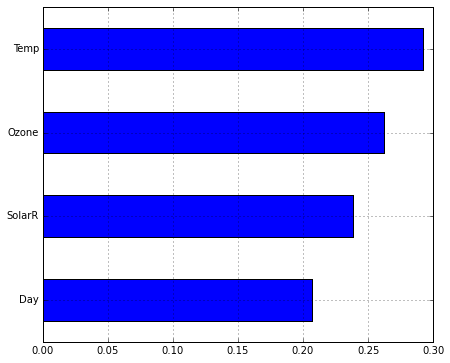

In [44]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(7,6));

In [45]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X, y)

1 loops, best of 3: 1.26 s per loop


In [46]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)

1 loops, best of 3: 1.22 s per loop


30 trees
C-stat:  0.648967297762

50 trees
C-stat:  0.671514629948

100 trees
C-stat:  0.679604130809

200 trees
C-stat:  0.684509466437

500 trees
C-stat:  0.680808950086

1000 trees
C-stat:  0.688812392427

2000 trees
C-stat:  0.695008605852



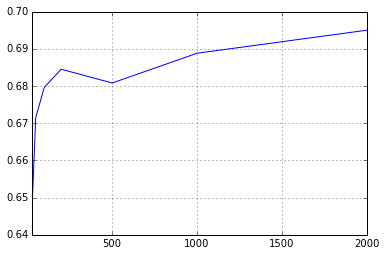

In [47]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, y)
    print trees, "trees"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

1 min samples
C-stat:  0.675645438898

2 min samples
C-stat:  0.7165232358

3 min samples
C-stat:  0.685025817556

4 min samples
C-stat:  0.683648881239

5 min samples
C-stat:  0.689845094664

6 min samples
C-stat:  0.672289156627

7 min samples
C-stat:  0.66678141136

8 min samples
C-stat:  0.662822719449

9 min samples
C-stat:  0.657142857143

10 min samples
C-stat:  0.65834767642



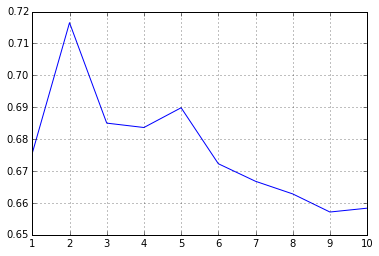

In [49]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=30, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features=0.2, 
                                  min_samples_leaf=min_samples)
    model.fit(X, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

In [50]:
model = RandomForestRegressor(n_estimators=30, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features=0.2, 
                              min_samples_leaf=6)
model.fit(X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc

C-stat:  0.672289156627


In [51]:
X.head()

,Ozone,SolarR,Temp,Day
0,41,190,67,1
1,36,118,72,2
2,12,149,74,3
3,18,313,62,4
4,17,152,56,5
